In [9]:
# The K-nearest neighbors (KNN) algorithm is a type of supervised machine learning algorithms. 
# KNN is extremely easy to implement in its most basic form, and yet performs quite complex classification tasks. 
# It is a lazy learning algorithm since it doesn't have a specialized training phase. Rather, 
# it uses all of the data for training while classifying a new data point or instance. 
# KNN is a non-parametric learning algorithm, which means that it doesn't assume anything about the underlying data. 
# This is an extremely useful feature since most of the real world data doesn't really follow any theoretical assumption 
# e.g. linear-separability, uniform distribution, etc.

# We will see how KNN can be implemented with Python's Scikit-Learn library

In [10]:
# We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: 
# sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. 
# The task is to predict the class to which these plants belong. There are three classes in the dataset: 
# Iris-setosa, Iris-versicolor and Iris-virginica.

#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# read dataset to pandas data frame

iris = pd.read_csv("Datasets/iris.csv")

In [20]:
# split dataset into attributes and variables
# X = first four coloumns of dataset
# y = labels

X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [13]:
# to create training and test splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
# scale the features to get uniform evaluation
# ie., to normalize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# training and prediction using KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# make the prediction on our dataset

y_pred = classifier.predict(X_test)

In [17]:
# evaluation of the algorithm using confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
# In the training and prediction section we said that there is no way to know beforehand which value of K that yields 
# the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.
# One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.
# In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) # result is appended to error

Text(0, 0.5, 'Mean Error')

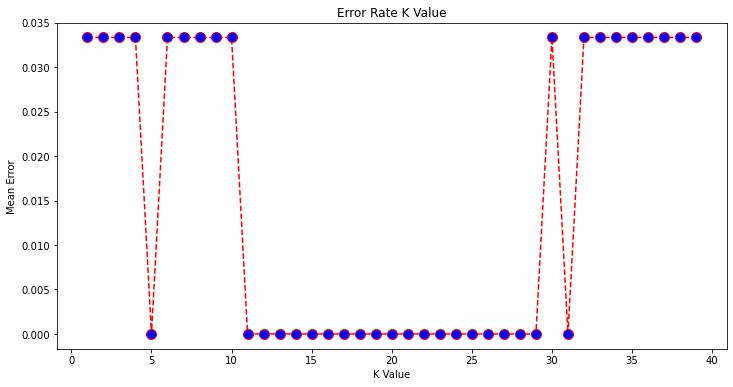

In [19]:
# plot error values against K

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')